In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import sys
print('파이썬 버전은?', sys.version)

파이썬 버전은? 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


imbalanced data

(array([10.,  7.,  8.,  9., 13., 10., 38., 11., 14., 11.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

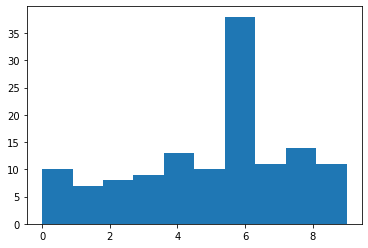

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터를 생성합니다.
data = [np.random.randint(0, 10) for _ in range(101)]

# 클래스 6에 해당하는 데이터를 30개 더 추가합니다.
for i in range(30):
    data.append(6)
    
plt.hist(data)

ROC CURVE

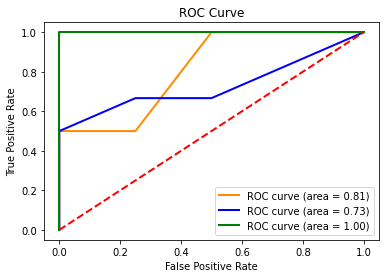

In [1]:
# 0 : 정상 햄버거
# 1 : 유통기한이 지난 햄버거
y_true = [0, 1, 1, 1, 1, 0, 1, 1, 0, 0]


# 각 클래스에 대한 확률은 임의로 지정합니다.
A_proba = [0.6, 0.7, 0.7, 0.8, 0.9, 0.7, 0.85, 0.7, 0.65, 0.75]
B_proba = [0.05, 0.05, 0.1, 0.3, 0.6, 0.3, 0.4, 0.5, 0.2, 0.1]

# 완벽한 모델
C_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
C_proba = [0, 1, 1, 1, 1, 0, 1, 1, 0, 0]

from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_true, A_proba)
fpr_B, tpr_B, thr_B = roc_curve(y_true, B_proba)
fpr_C, tpr_C, thr_C = roc_curve(y_true, C_proba)

auc_A = auc(fpr_A, tpr_A)
auc_B = auc(fpr_B, tpr_B)
auc_C = auc(fpr_C, tpr_C)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)
plt.plot(fpr_B, tpr_B, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % auc_B)
plt.plot(fpr_C, tpr_C, color='green',
         lw=2, label='ROC curve (area = %0.2f)' % auc_C)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()

# A를 선택한 이유
# A의 면적이 제일 크기 때문이다